In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.integrate import odeint
from lmfit.lineshapes import gaussian, lorentzian
import lmfit
import datetime as dt

## SIR

In [2]:
# SIR equations
def SIR (y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * I * S / N
    dIdt = beta * I * S / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
# N, population
N = 1000

# beta, number of people an infected person infects per day
beta = 1.0

# D, number of days a person is infectious
D = 5.0

# gamma, proportion of infected recovering per day
gamma = 1/D

# initial conditions
S0, I0, R0 = 999, 1, 0

In [4]:
# grid of time points (days)
t = np.linspace(0, 99, 100)

# initial conditions vector
y0 = S0, I0, R0

#integrate SIR equations over the time grid
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [5]:
def plotSIR(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

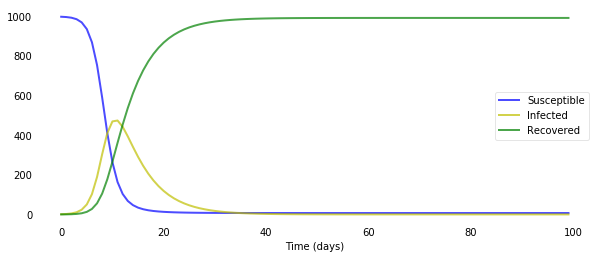

In [6]:
plotSIR(t, S, I, R)

# SEIR

In [7]:
def SEIR(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [8]:
# N, population
N = 1000

# beta, number of people an infected person infects per day
beta = 1.0

# D, number of days a person is infectious
D = 5.0

# gamma, proportion of infected recovering per day
gamma = 1.0 / D

#delta, incubation period
delta = 1.0 / 5.0

# initial conditions (susceptible, exposed, infected, recovered)
S0, E0, I0, R0 = N - 1, 1, 0, 0

In [9]:
#time grid
t = np.linspace(0, 99, 100)

#initial conditions vector
y0 = S0, E0, I0, R0
ret = odeint(SEIR, y0, t, args=(N, beta, gamma, delta))
S, E, I, R, = ret.T

In [10]:
def plotSEIR(t, S, E, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, E, 'r', alpha=0.7, linewidth=2, label='Exposed')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

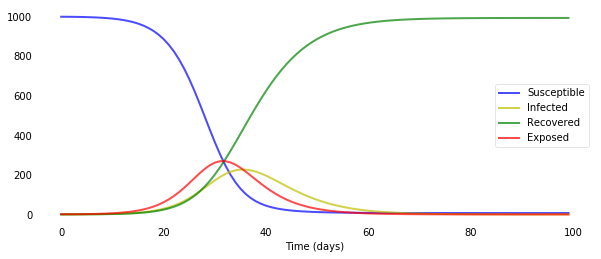

In [11]:
plotSEIR(t, S, E, I, R)

# Fitting Models to Data - Dummy Example

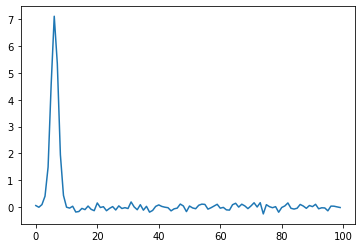

In [12]:
# set seed
np.random.seed(42)

# generate time grid
t = np.linspace(0, 99, 100)
data = (gaussian(t, 21, 6.1, 1.2) + np.random.normal(scale=0.1, size=t.size))  # normal distr. with some noise|

# plot
plt.plot(t, data)

In [13]:
# create function that takes t, time and parameters to be fitted (a, b, c)
def function(t, a, b, c):
    return gaussian(t, a, b, c)

In [14]:
model = lmfit.Model(function)

#set parameters and initial guesses
model.set_param_hint("a", value = 10.0, vary=True)
model.set_param_hint("b", value = 10.0, vary=True)
model.set_param_hint("c", value = 10.0, vary=True)

params = model.make_params()

#fit the model
result = model.fit(data, params, method = "leastsq", t=t)

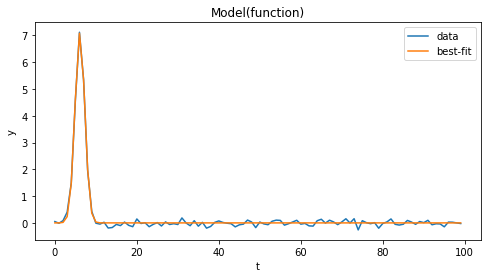

In [15]:
#results
plt.figure(figsize=(8,4))
result.plot_fit(datafmt="-");
result.best_values

result

## Fitting Model with Real Data

In [17]:
df = pd.read_csv('ny.csv', index_col=False)
df = df.drop(['Unnamed: 0'], axis=1)
df = df[(df['Province/State'] == 'New York')]
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# start data with first confirmed case
# NOTE: for real model, this must be changed. the first *true* case was obviously way before 2020-03-03
df = df[df['Confirmed']>=1]
df.head()


,Date,Province/State,Confirmed,Deaths,new_confirmed,new_deaths,new_confirmed_avg,new_deaths_avg
8873,2020-03-03,New York,1,0,1,0,0.142857,0.0
8874,2020-03-04,New York,10,0,9,0,1.428571,0.0
8875,2020-03-05,New York,21,0,11,0,3.000000,0.0
8876,2020-03-06,New York,24,0,3,0,3.428571,0.0
8877,2020-03-07,New York,76,0,52,0,10.857143,0.0


C:\Users\louis\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


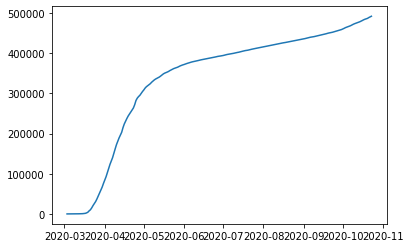

In [18]:
#total cases over time
plt.plot(df['Date'], df['Confirmed'])

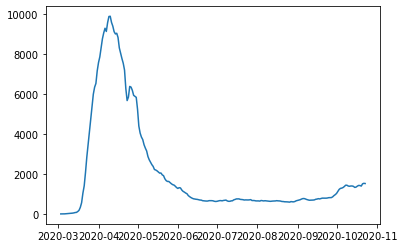

In [19]:
#new cases over time
plt.plot(df['Date'], df['new_confirmed_avg'])

In [20]:
# SIR equations
def deriv (y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * I * S / N
    dIdt = beta * I * S / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

pop = 19378102 # population of NY state
days = len(df)

y_data = df['Confirmed']
t_data = np.linspace(0, days - 1, days, dtype=int)

def Model(days, pop):

    N = pop

    y0 = N, 1, 0
    t = np.linspace(0, days-1, days)
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    return t, S, I, R

In [21]:
def fitter(x, beta, gamma):
    ret = Model(days, pop)
    return ret[2][x]

mod = lmfit.Model(fitter)

params_init_min_max = {"beta": (1.0, .05, 2.0), "gamma": (1/12, 1/4, 1/24)}
for kwarg, (init, mini, maxi) in params_init_min_max.items():
    mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)

params = mod.make_params()
fit_method = "leastsq"

In [22]:
result = mod.fit(y_data, params, method="least_squares", x = t_data)

In [23]:
#best parameters
result.best_values

{'beta': 1.0, 'gamma': 0.041666666766666666}

In [24]:
df.tail(14)

,Date,Province/State,Confirmed,Deaths,new_confirmed,new_deaths,new_confirmed_avg,new_deaths_avg
9094,2020-10-10,New York,473143,33293,1447,3,1397.571429,13.714286
9095,2020-10-11,New York,474286,33294,1143,1,1386.285714,12.714286
9096,2020-10-12,New York,475315,33301,1029,7,1400.000000,12.428571
9097,2020-10-13,New York,476708,33306,1393,5,1400.000000,12.428571
9098,2020-10-14,New York,477940,33316,1232,10,1381.714286,12.857143
9099,2020-10-15,New York,479400,33337,1460,21,1328.000000,15.714286
9100,2020-10-16,New York,481107,33337,1707,0,1344.428571,6.714286
9101,2020-10-17,New York,482891,33347,1784,10,1392.571429,7.714286
9102,2020-10-18,New York,484281,33357,1390,10,1427.857143,9.000000
9103,2020-10-19,New York,485279,33366,998,9,1423.428571,9.285714


# (Very Quick and Rough) Demo Projection

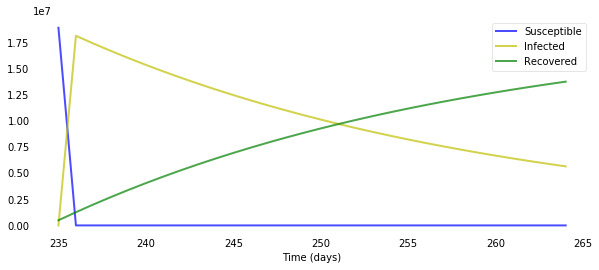

In [25]:
# run projection using those best parameters
y0 = (19378102 - 491771), 1500, (491771 - 1500)

t = np.linspace(235, 264, 30)

beta = 1.0 # 
gamma = 0.041666666766666666

ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

plotSIR(t, S, I, R)